In [151]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usedcarscatalog/cars.csv


In [152]:
import matplotlib.pyplot as plt

In [153]:
dataset = pd.read_csv("/kaggle/input/usedcarscatalog/cars.csv")
dataset

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


# Eliminate Unnecessary Columns
The exercise is to see if we can preemptively predict the price of cars before they get on the marketplace. Therefore we're going to remove columns that wouldn't be available for analysis prior to posting

In [154]:
columns_drop = dataset.copy()
columns_drop.drop(columns=['duration_listed', 'number_of_photos', 'is_exchangeable', 'up_counter'], inplace=True)
columns_drop.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'location_region', 'feature_0', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'feature_9'],
      dtype='object')

We don't know what the feature_1-feature_9 corellate to. So for explainibility's sake we're going to exclude them.

Also, duration_listed is a column of data that would not be available to someone who was using this model to predict the value of the car they wanted to sell, so we'll drop that as well. 

In [155]:
'''
columns_drop = columns_drop.loc[:, ['manufacturer_name', 'model_name', 'transmission', 'color', 
                                    'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas', 
                                    'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
                                    'drivetrain', 'price_usd', 'is_exchangeable', 'location_region']]
'''

columns_drop

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,False,True,True,True,False,True,False,True,True,True
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,False,True,False,False,True,True,False,False,False,True
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,True,False,False,False,False,False,False,True,True
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,True,False,False,False,False,False,False,False,False,False
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,False,True,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,False,True,False,False,True,True,False,False,True,True
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,False,True,False,False,True,True,False,False,True,True
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,False,True,False,False,True,True,False,False,True,True
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,False,True,False,False,False,False,False,False,False,True


# Data Analysis
This will help us determine which variables will be of most interest to run our ML algorithms on. Not all variables will help us get the desired result

In [156]:
corr_matrix = columns_drop.copy()
corr_matrix = corr_matrix.corr()

corr_matrix

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
odometer_value,1.000000,-0.488679,0.057786,0.105704,-0.189498,-0.421204,0.105917,-0.150960,-0.076169,-0.229082,-0.067292,-0.240968,-0.166413,-0.254539,-0.208844,-0.087875
year_produced,-0.488679,1.000000,-0.074686,0.005059,0.209231,0.705511,-0.346980,0.424750,0.205039,0.431307,0.184757,0.435241,0.345745,0.457091,0.465969,0.247439
engine_has_gas,0.057786,-0.074686,1.000000,0.084579,-0.020667,-0.062528,0.004089,-0.008071,-0.012030,-0.027034,0.003547,-0.031172,-0.030140,-0.036635,-0.041992,-0.005855
engine_capacity,0.105704,0.005059,0.084579,1.000000,-0.054583,0.296597,-0.142097,0.134315,0.375726,0.243494,0.452533,0.273235,0.284419,0.202070,0.240077,0.245828
has_warranty,-0.189498,0.209231,-0.020667,-0.054583,1.000000,0.285532,0.149966,-0.121138,-0.046124,-0.036166,-0.046572,-0.044887,-0.021049,-0.024925,-0.058637,-0.094622
price_usd,-0.421204,0.705511,-0.062528,0.296597,0.285532,1.000000,-0.223896,0.255806,0.338166,0.470929,0.336143,0.434471,0.451714,0.498547,0.449131,0.266156
feature_0,0.105917,-0.346980,0.004089,-0.142097,0.149966,-0.223896,1.000000,-0.676718,-0.292278,-0.335893,-0.307094,-0.404747,-0.247182,-0.325759,-0.458741,-0.638831
feature_1,-0.150960,0.424750,-0.008071,0.134315,-0.121138,0.255806,-0.676718,1.000000,0.253534,0.325128,0.267914,0.399224,0.242606,0.316886,0.454120,0.396397
feature_2,-0.076169,0.205039,-0.012030,0.375726,-0.046124,0.338166,-0.292278,0.253534,1.000000,0.437269,0.484722,0.422779,0.419173,0.387818,0.412211,0.373766
feature_3,-0.229082,0.431307,-0.027034,0.243494,-0.036166,0.470929,-0.335893,0.325128,0.437269,1.000000,0.399051,0.496255,0.502680,0.522689,0.508890,0.378395


My experience with cars tells me that Make and Model can be especially important in determining the value of a car in the used market. Lexus for example tend to fetch higher prices than BMWs in the US.

<BarContainer object of 55 artists>

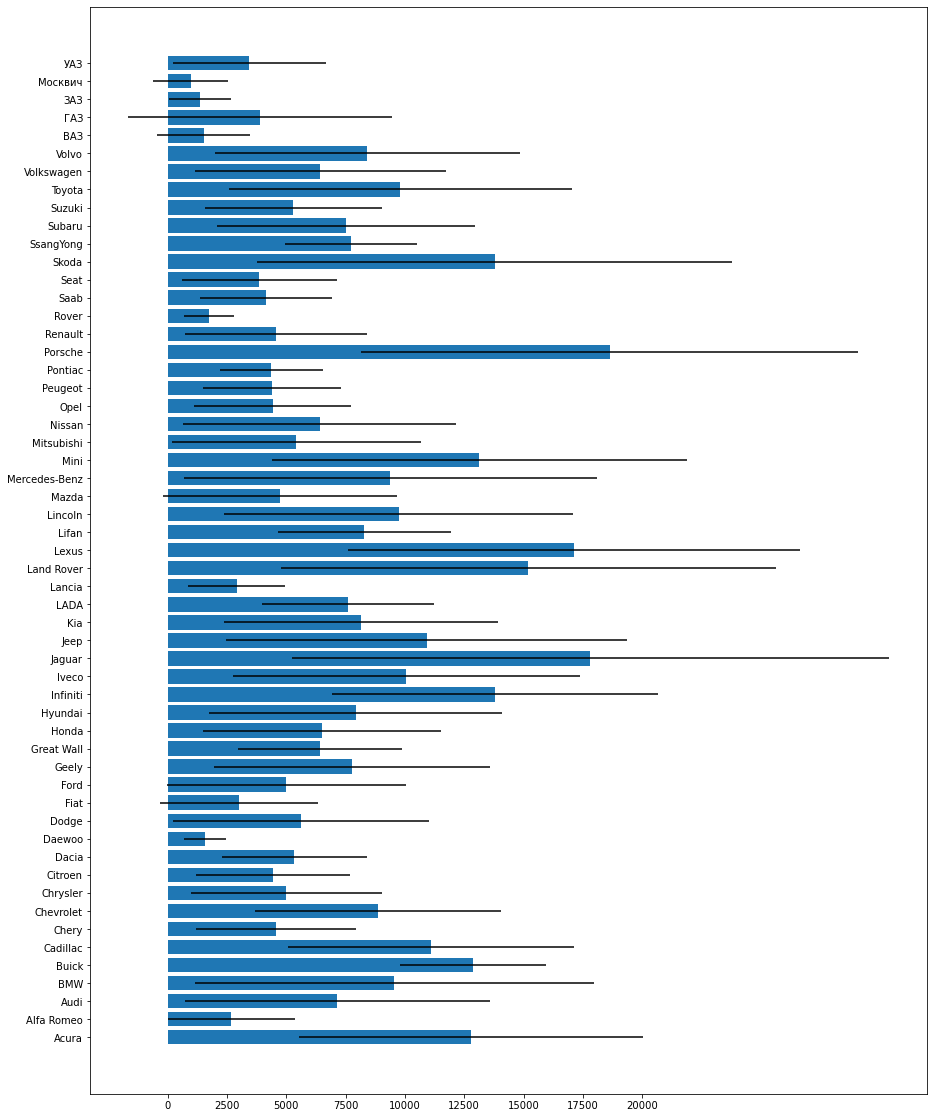

In [157]:
car_make_visualization = columns_drop.loc[:, ['manufacturer_name', 'price_usd']]
car_make_visualization_mean = car_make_visualization.groupby("manufacturer_name")['price_usd'].mean().reset_index()
error_bars = car_make_visualization.groupby("manufacturer_name")['price_usd'].std().reset_index()

plt.figure(figsize=(15, 20))
ax = plt.subplot()
ax.set_xticks(range(0, 22500, 2500))
plt.barh(car_make_visualization_mean['manufacturer_name'], car_make_visualization_mean['price_usd'], xerr= error_bars.iloc[:, 1])

In [158]:
brands = ['Acura', 'Alfa-Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chery',
       'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
       'Fiat', 'Ford', 'Geely', 'Great-Wall', 'Honda', 'Hyundai',
       'Infiniti', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'Lada', 'Lancia',
       'Land-Rover', 'Lexus', 'Lifan', 'Lincoln', 'Mazda',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
       'Pontiac', 'Porsche', 'Renault', 'Rover', 'Saab', 'SEAT', 'Skoda',
       'SsangYong', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo',
       'Lada', 'GAZ', 'ZAZ', 'moskvich', 'UAZ']

import matplotlib.image as mpimg
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

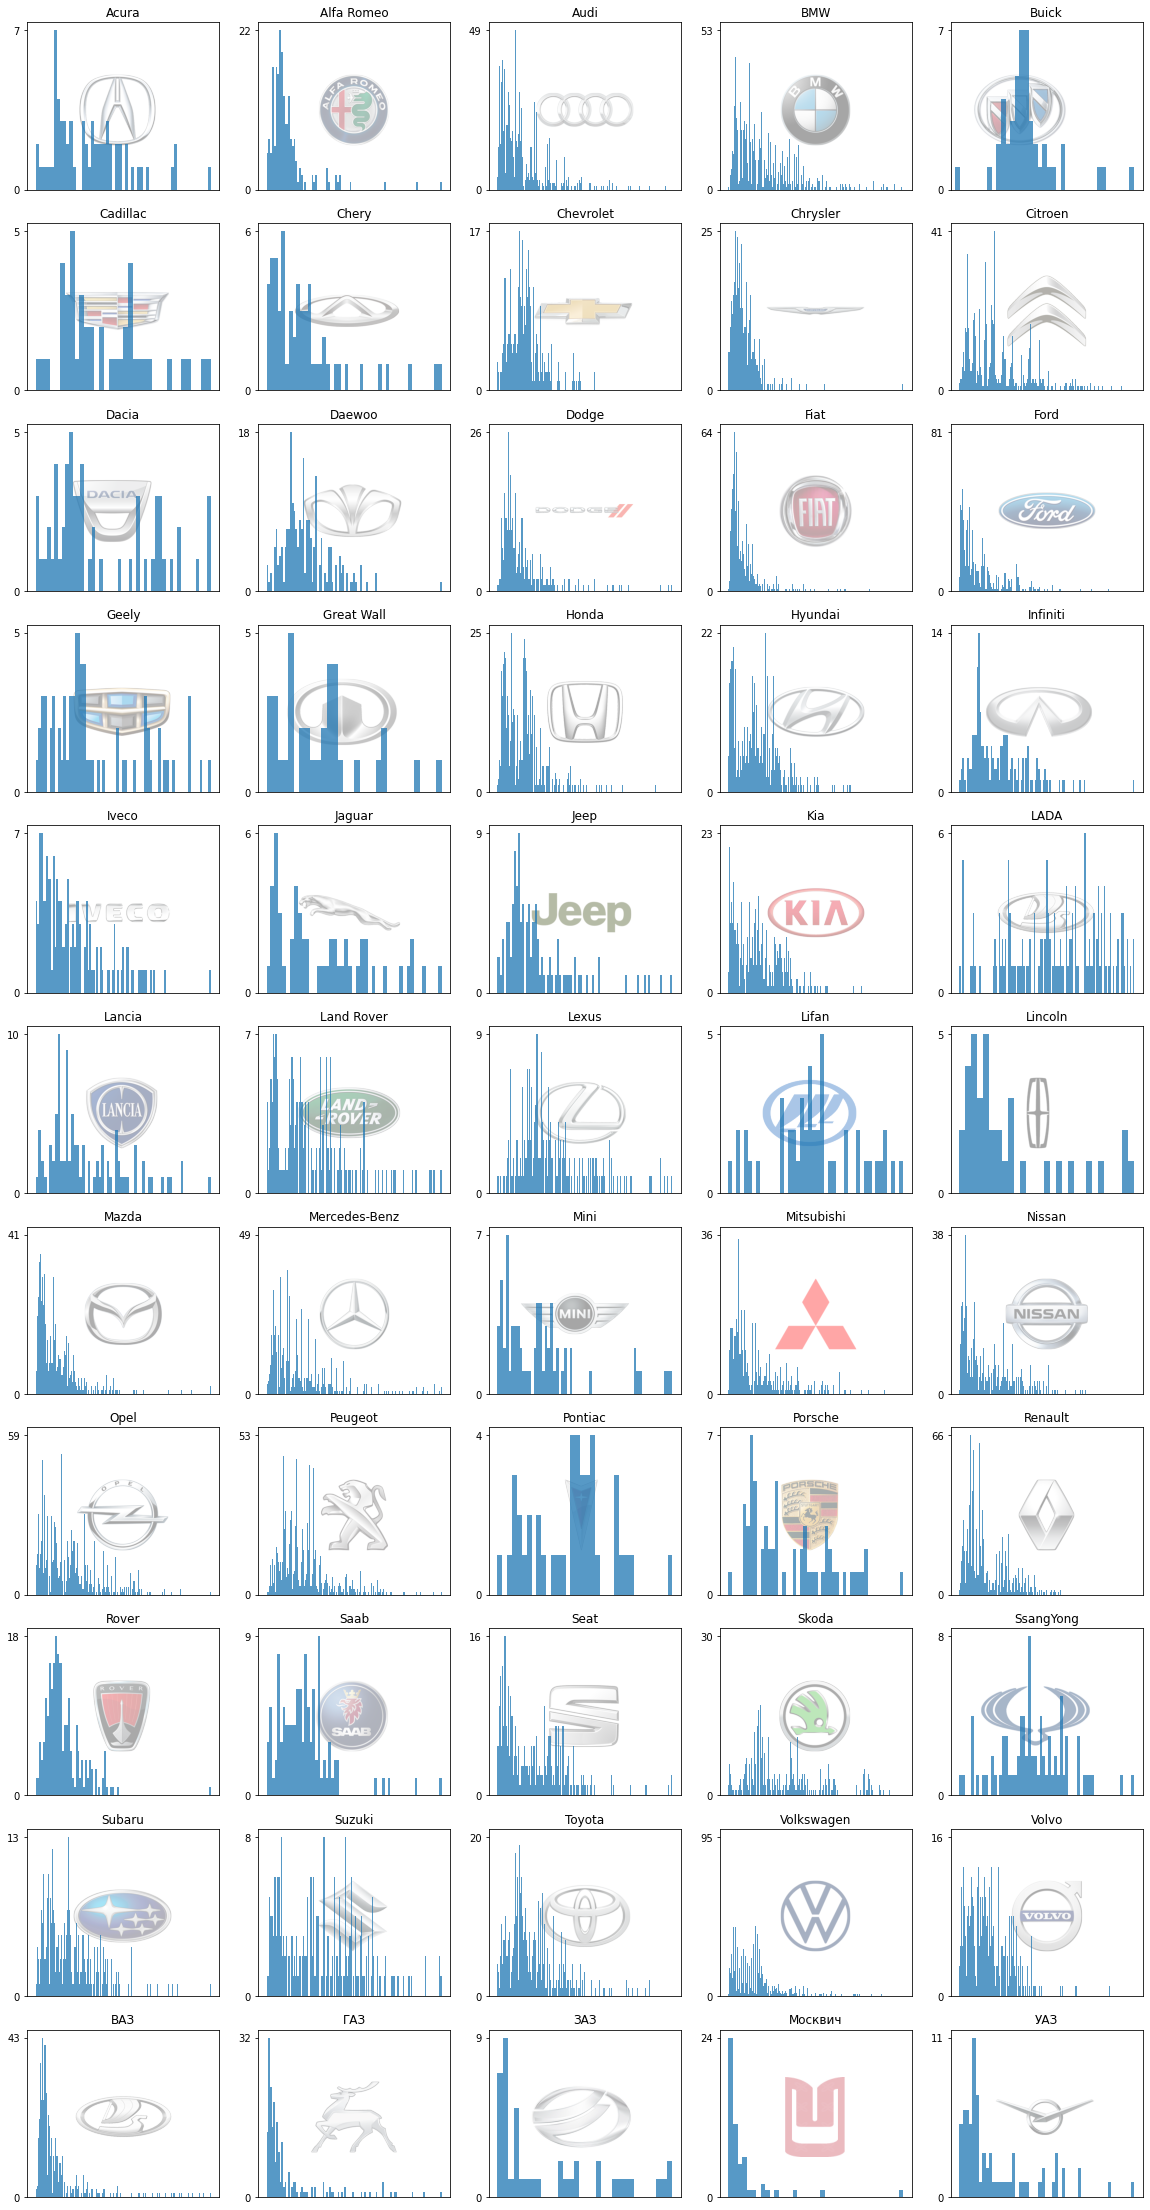

In [159]:
plt.figure(figsize=(20, 40), facecolor='white')
plt.title("Distribution of Prices for Used Cars in Belarus")

z = 0

for i in np.sort(car_make_visualization['manufacturer_name'].unique()):
    z+=1
    plt.subplot(11, 5, z)
    make_plot = car_make_visualization[car_make_visualization['manufacturer_name'] == i].sort_values(by='price_usd').reset_index()

    x_hist, y_hist = np.histogram(make_plot['price_usd'], bins=len(make_plot['price_usd'].unique()))
    
    try:
        img=mpimg.imread(f'https://www.carlogos.org/logo/{brands[z-1]}-logo.png')
    except:
        img=mpimg.imread(f'https://car-logos.com/images/lsm/{brands[z-1]}-logo.png')
    
    plt.imshow(img, origin='upper', alpha=0.35, aspect='auto', 
            extent=(make_plot['price_usd'].max()*0.2, make_plot['price_usd'].max()*0.8, 
                    x_hist.max()*0.25, x_hist.max()*0.75))
    
    plt.hist(make_plot['price_usd'], bins=len(make_plot['price_usd'].unique()), alpha=0.75)
    
    plt.xticks(ticks=[], labels=[])
    plt.yticks(ticks=[0, x_hist.max()], labels=[0, x_hist.max()])
    plt.title(i)

plt.show() 

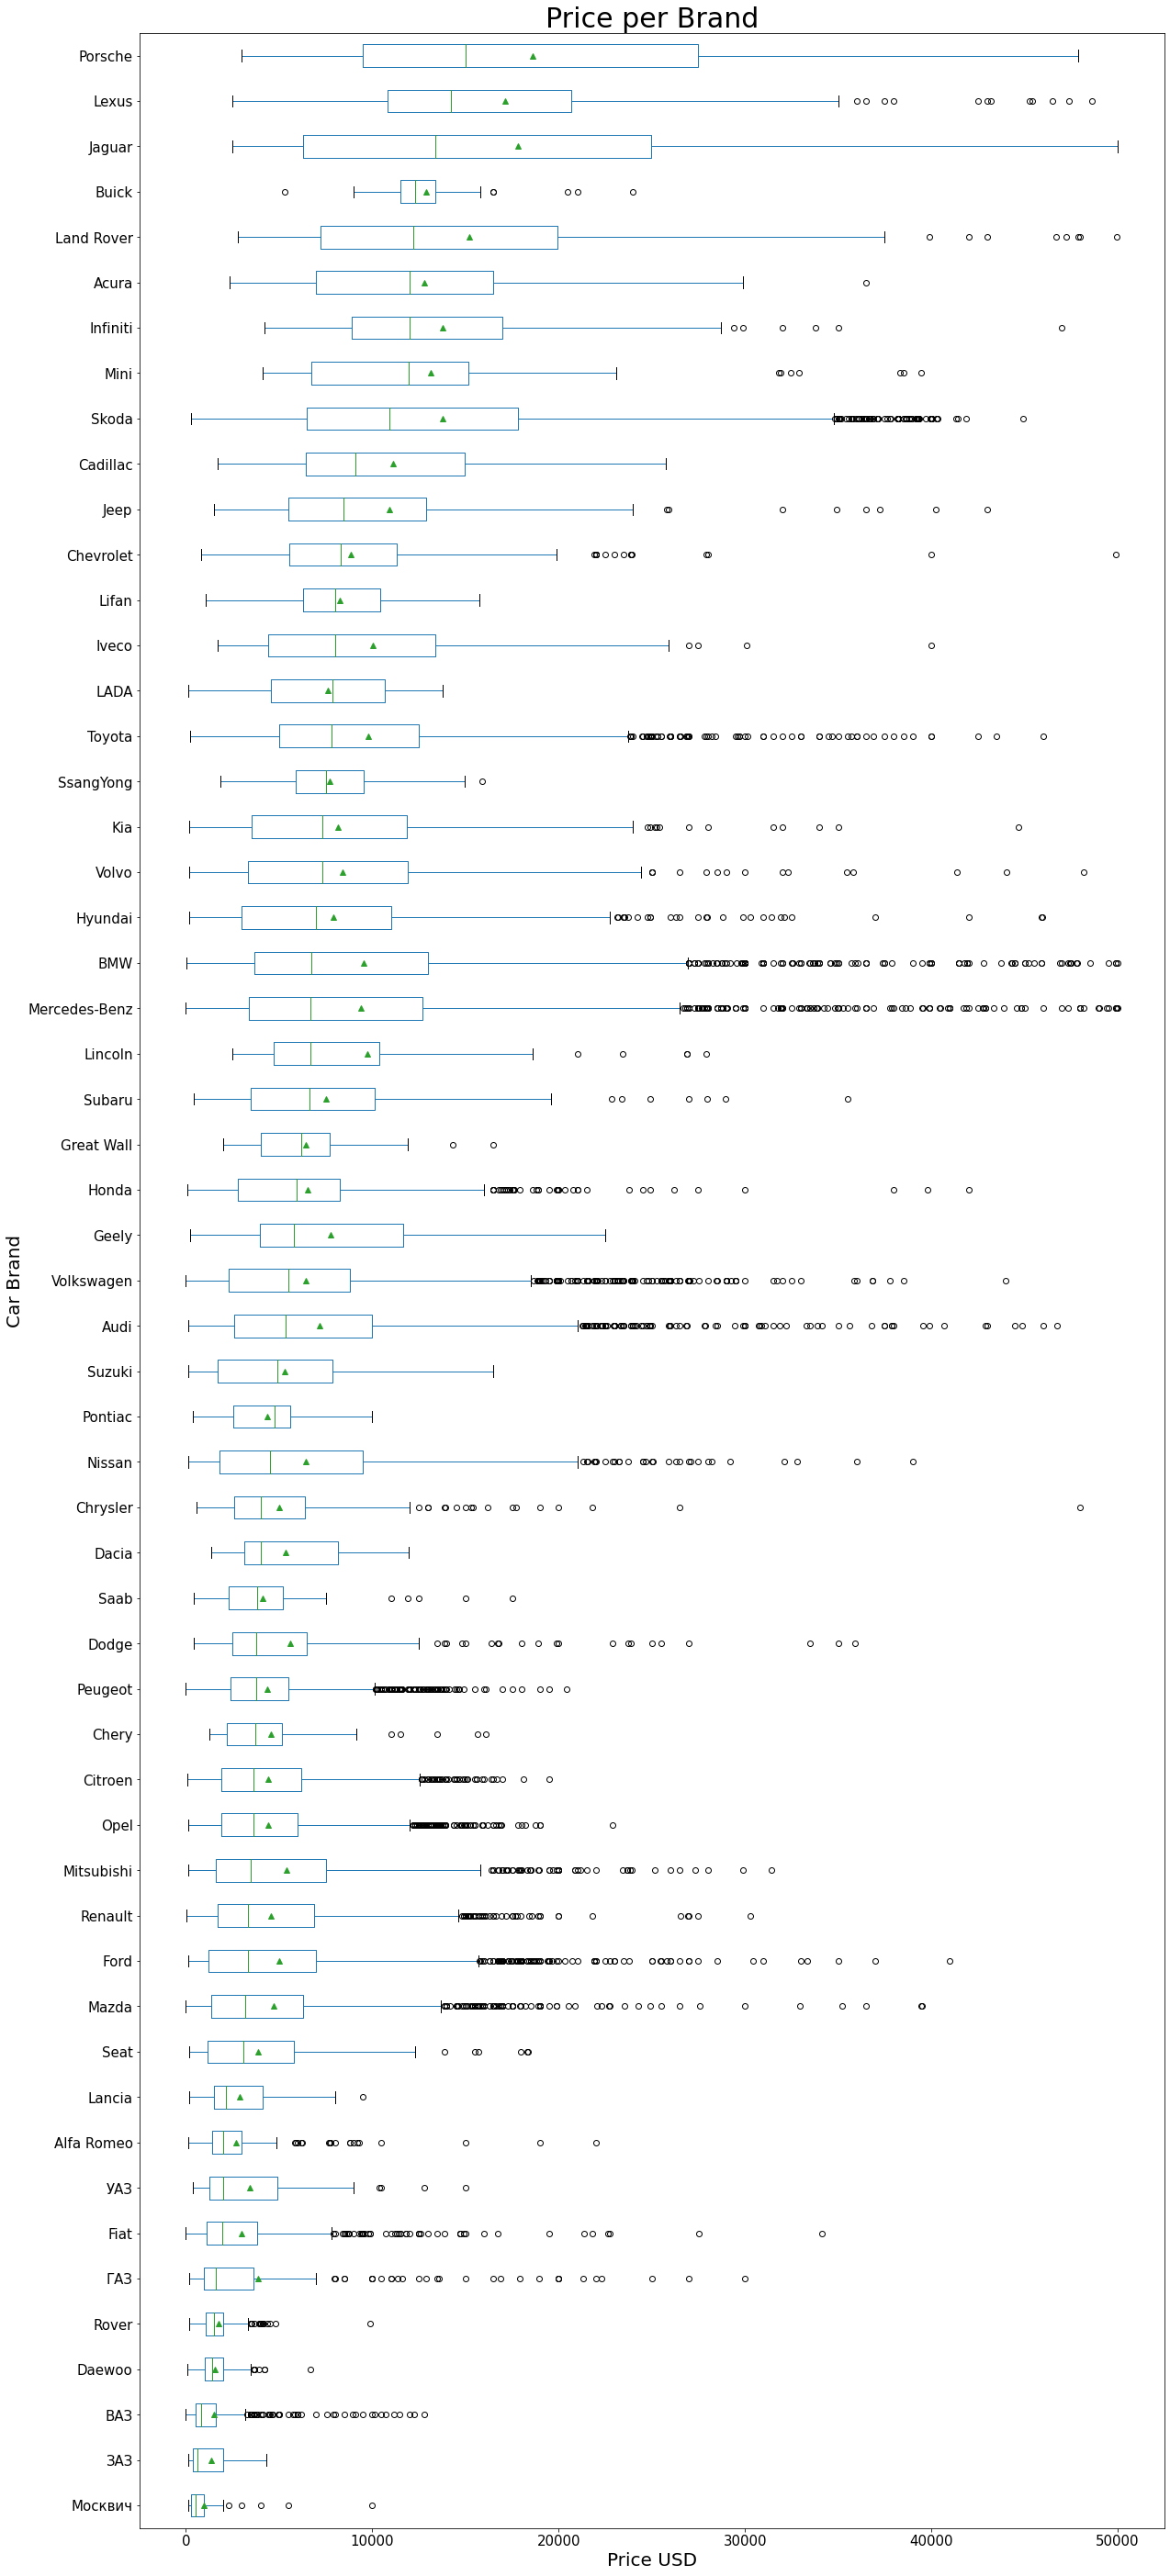

In [160]:
def boxplot_sorted(df, by, column, rot=0):

    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})

    meds = df2.median().sort_values()

    return df2[meds.index].boxplot(rot=rot, return_type="axes", vert=False, 
                                   figsize=(20, 50), fontsize=15, showmeans=True)

axes = boxplot_sorted(car_make_visualization, by = ['manufacturer_name'], column = 'price_usd')
axes.grid(False)
plt.xlabel('Price USD', fontsize=20)
plt.ylabel('Car Brand', fontsize=20)
plt.title('Price per Brand', fontsize=30)
plt.show()

In [161]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

ANOVA_test_columns = columns_drop.copy()
temp = columns_drop.copy()
temp = temp.loc[:, 'price_usd']
ANOVA_test_columns = ANOVA_test_columns.select_dtypes(include='object')
ANOVA_test_columns = pd.concat([ANOVA_test_columns, temp], axis=1)
ANOVA_test_columns

for i in ANOVA_test_columns.columns[0:-1]:
    mod = ols(f'price_usd ~ {i}', data=ANOVA_test_columns).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table, '\n')

                         sum_sq       df           F  PR(>F)
manufacturer_name  2.944511e+11     54.0  161.678028     0.0
Residual           1.297652e+12  38476.0         NaN     NaN 

                  sum_sq       df         F  PR(>F)
model_name  9.809978e+11   1117.0  53.76765     0.0
Residual    6.111057e+11  37413.0       NaN     NaN 

                    sum_sq       df             F  PR(>F)
transmission  3.613595e+11      1.0  11312.525507     0.0
Residual      1.230744e+12  38529.0           NaN     NaN 

                sum_sq       df           F  PR(>F)
color     1.703775e+11     11.0  419.641596     0.0
Residual  1.421726e+12  38519.0         NaN     NaN 

                   sum_sq       df           F         PR(>F)
engine_fuel  2.269599e+10      5.0  111.425853  2.655349e-117
Residual     1.569407e+12  38525.0         NaN            NaN 

                   sum_sq       df           F        PR(>F)
engine_type  1.275034e+10      2.0  155.521015  5.361182e-68
Residual     

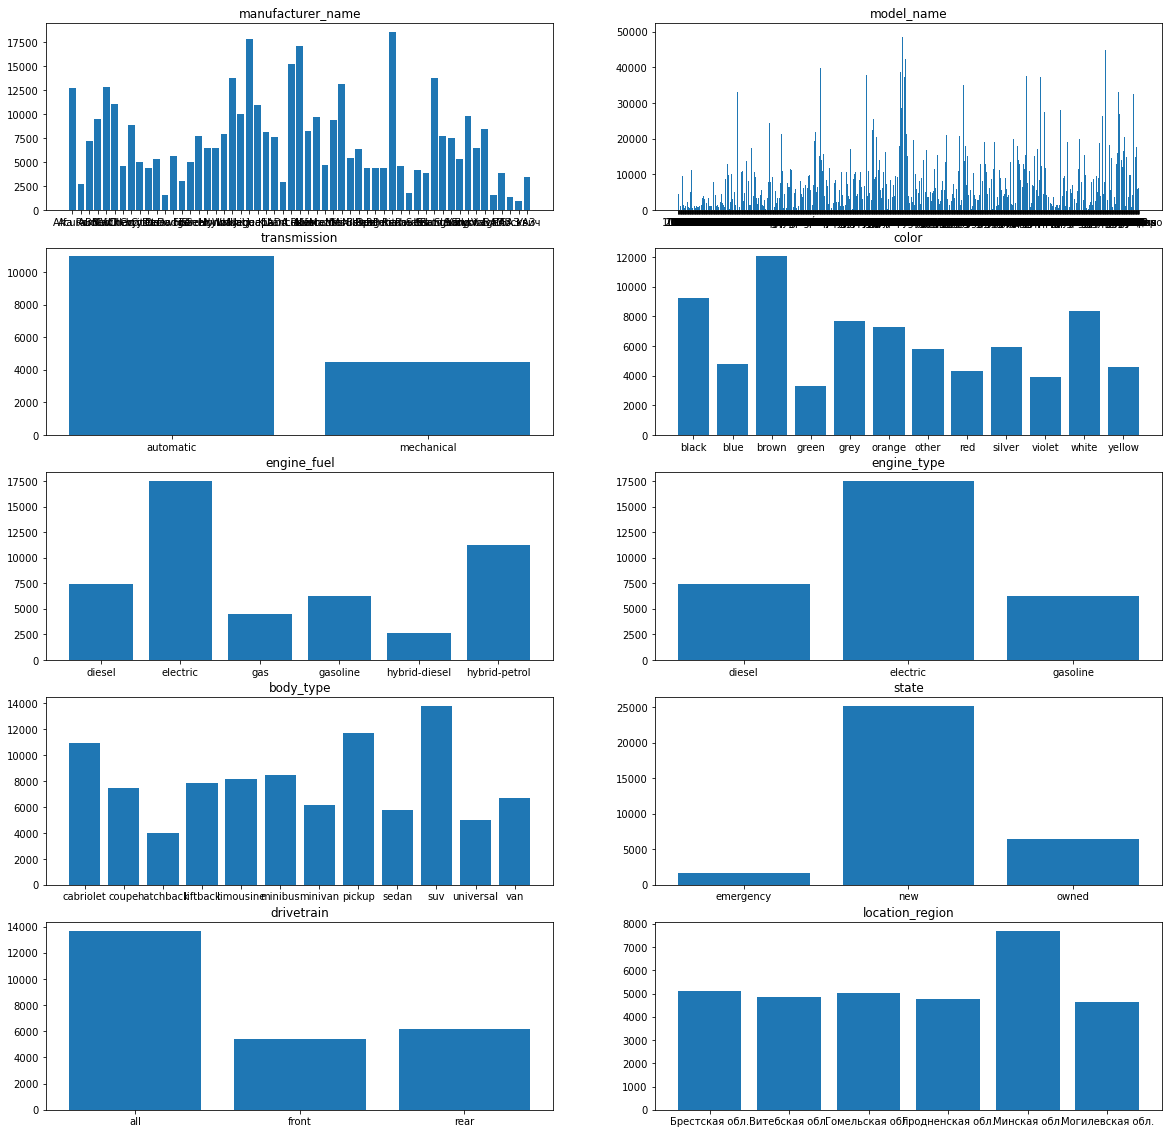

In [162]:
plt.figure(figsize=(20, 20))

z=0

for i in ANOVA_test_columns.columns[0:-1]:
    z+=1
    test = ANOVA_test_columns.groupby(i)['price_usd'].mean().reset_index()
    plt.subplot(5, 2, z)
    plt.bar(test.iloc[:, 0], test.iloc[:, -1])
    #plt.xticks(ticks=[], labels=[])
    plt.title(i)
plt.show()

Looking at the above charts it appears that 'location_region' is not going to be a powerful predictor as it doesn't have much variation in the mean price per location.



There are a lot of cars that have a listing price of $1.00. This is most likely inaccurate and these values will be dropped

In [163]:
row_drop = columns_drop.copy()
row_drop = row_drop[row_drop['price_usd'] > 100]
row_drop.drop(columns='location_region', inplace=True)

### Binning
We will combine attributes that are realatively similar to give our model cleaner data to work with

In [164]:
engine_type_replace = {'diesel':'gasoline'}
state_replace = {'emergency':'owned'}
drivetrain_replace = {'front':'rear'}

row_drop['engine_type'].replace(engine_type_replace, inplace=True)
row_drop['state'].replace(state_replace, inplace=True)
row_drop['drivetrain'].replace(drivetrain_replace, inplace=True)
print(row_drop['engine_type'].unique(), row_drop['state'].unique(), row_drop['drivetrain'].unique())

['gasoline' 'electric'] ['owned' 'new'] ['all' 'rear']


In [165]:
y = row_drop.copy()
y = y.loc[:, 'price_usd']

X = row_drop.copy()
X = X.drop(columns='price_usd')

## Impute Values

In [166]:
X.dropna(axis=1, inplace=True)

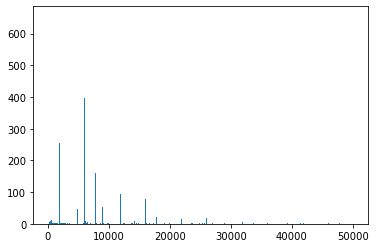

In [167]:
plt.hist(y, bins = 10000)
plt.show()

In [168]:
y.value_counts()

#plt.hist(y.value_counts())

1500.00     637
3500.00     568
2000.00     561
1000.00     552
2500.00     546
           ... 
3322.40       1
4540.00       1
12286.11      1
15128.52      1
789.00        1
Name: price_usd, Length: 2670, dtype: int64

## Label Encode

In [169]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in ['body_type', 'color', 'transmission', 'engine_fuel', 'engine_type', 'state', 'drivetrain']:
    X.loc[:,i] = le.fit_transform(X.loc[:,i])
X

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,body_type,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,Subaru,Outback,0,8,190000,2010,3,False,1,10,...,False,True,True,True,False,True,False,True,True,True
1,Subaru,Outback,0,1,290000,2002,3,False,1,10,...,False,True,False,False,True,True,False,False,False,True
2,Subaru,Forester,0,7,402000,2001,3,False,1,9,...,False,True,False,False,False,False,False,False,True,True
3,Subaru,Impreza,1,1,10000,1999,3,False,1,8,...,True,False,False,False,False,False,False,False,False,False
4,Subaru,Legacy,0,0,280000,2001,3,False,1,10,...,False,True,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,0,8,290000,2000,3,False,1,8,...,False,True,False,False,True,True,False,False,True,True
38527,Chrysler,PT Cruiser,1,1,321000,2004,0,False,1,2,...,False,True,False,False,True,True,False,False,True,True
38528,Chrysler,300,0,1,777957,2000,3,False,1,8,...,False,True,False,False,True,True,False,False,True,True
38529,Chrysler,PT Cruiser,1,0,20000,2001,3,False,1,6,...,False,True,False,False,False,False,False,False,False,True


In [171]:
X.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'body_type', 'has_warranty', 'state', 'drivetrain',
       'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9'],
      dtype='object')

## One Hot Encode

We're One Hot Encoding: Color, Make+Model

In [136]:
ohe_table = X.copy()

ohe_table['make_model'] = ohe_table['manufacturer_name'] + ohe_table['model_name']
ohe_table.drop(columns=['model_name', 'manufacturer_name'], inplace=True)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [21])], remainder='passthrough')

ohe_table = np.array(ct.fit_transform(ohe_table))

## Train-Test Split

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ohe_table, y, test_size=0.2, random_state=0)

## Scaling Variables

In [139]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.fit_transform(X_test)

# Modelling

Setting up the MAE output

In [140]:
from sklearn.metrics import mean_absolute_error

results = [['Model', 'MAE']]

## Support Vector Machine Regressor

In [141]:
'''
from sklearn.svm import SVR
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))

results.append(['Support Vector Machines', str(mean_absolute_error(y_pred, y_test))])
'''

'\nfrom sklearn.svm import SVR\nsvm = SVR(kernel=\'rbf\')\nsvm.fit(X_train, y_train)\n\ny_pred = svm.predict(X_test)\n\nprint("MAE: " + str(mean_absolute_error(y_pred, y_test)))\n\nresults.append([\'Support Vector Machines\', str(mean_absolute_error(y_pred, y_test))])\n'

## Cat Boost Regressor

In [142]:
from catboost import CatBoostRegressor

cb_model = CatBoostRegressor(iterations=2500,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)

cb_model.fit(X_train, y_train,
             eval_set=(X_test, y_test),
             use_best_model=True,
             verbose=50)

0:	learn: 6171.4689725	test: 6271.5040043	best: 6271.5040043 (0)	total: 30.1ms	remaining: 1m 15s
50:	learn: 2542.9424282	test: 2649.8962474	best: 2649.8962474 (50)	total: 1.31s	remaining: 1m 2s
100:	learn: 2220.3896885	test: 2327.1608760	best: 2327.1608760 (100)	total: 2.53s	remaining: 1m
150:	learn: 2089.1632225	test: 2226.0702211	best: 2226.0702211 (150)	total: 3.75s	remaining: 58.3s
200:	learn: 1997.0173982	test: 2164.6125676	best: 2164.6125676 (200)	total: 4.95s	remaining: 56.6s
250:	learn: 1919.8317773	test: 2110.9669139	best: 2110.9669139 (250)	total: 6.18s	remaining: 55.4s
300:	learn: 1857.6869552	test: 2074.2658456	best: 2074.2658456 (300)	total: 7.39s	remaining: 54s
350:	learn: 1799.3732990	test: 2051.2880875	best: 2051.2880875 (350)	total: 8.6s	remaining: 52.7s
400:	learn: 1749.0007710	test: 2033.8106360	best: 2033.8106360 (400)	total: 9.81s	remaining: 51.4s
450:	learn: 1706.5529355	test: 2021.9378796	best: 2021.9378796 (450)	total: 11s	remaining: 50.1s
500:	learn: 1664.71283

In [143]:
y_pred = cb_model.predict(X_test)

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))

results.append(['CatBoost Regressor', str(mean_absolute_error(y_pred, y_test))])

MAE: 1151.214974565894


## XG Boost Regressor

In [144]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train)

predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

results.append(['XG Boost Regressor', str(mean_absolute_error(predictions, y_test))])

Mean Absolute Error: 1277.325446875071


## Light GBM Regressor

In [145]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'RMSE', 'l1'},
    'num_leaves': 1000,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 10
}

lb_model = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=10)

[1]	valid_0's l1: 4457.94	valid_0's rmse: 6239.39
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 4263.4	valid_0's rmse: 5990.18
[3]	valid_0's l1: 4080.02	valid_0's rmse: 5760.29
[4]	valid_0's l1: 3906.4	valid_0's rmse: 5538.25
[5]	valid_0's l1: 3744.57	valid_0's rmse: 5333.19
[6]	valid_0's l1: 3589.35	valid_0's rmse: 5136.37
[7]	valid_0's l1: 3443.38	valid_0's rmse: 4956.86
[8]	valid_0's l1: 3305.14	valid_0's rmse: 4779.8
[9]	valid_0's l1: 3175.23	valid_0's rmse: 4614.57
[10]	valid_0's l1: 3052.09	valid_0's rmse: 4458.21
[11]	valid_0's l1: 2955.25	valid_0's rmse: 4333.96
[12]	valid_0's l1: 2846.34	valid_0's rmse: 4198.81
[13]	valid_0's l1: 2744.87	valid_0's rmse: 4072.22
[14]	valid_0's l1: 2647.84	valid_0's rmse: 3946.9
[15]	valid_0's l1: 2557.74	valid_0's rmse: 3834.22
[16]	valid_0's l1: 2473.43	valid_0's rmse: 3724.85
[17]	valid_0's l1: 2394.93	valid_0's rmse: 3623.25
[18]	valid_0's l1: 2320.49	valid_0's rmse: 3526.97
[19]	valid_0's l1: 2251.8	valid_0'

In [146]:
y_pred = lb_model.predict(X_test, num_iteration=lb_model.best_iteration)

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))

results.append(['Light GBM', str(mean_absolute_error(y_pred, y_test))])


MAE: 1209.1242054929703


## Random Forest Regressor

In [147]:
from sklearn.ensemble import RandomForestRegressor

rndm_frst = RandomForestRegressor(n_estimators=300, random_state=0)

rndm_frst.fit(X_train, y_train)

y_pred = rndm_frst.predict(X_test)

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))

results.append(['Random Forest Regressor', str(mean_absolute_error(y_pred, y_test))])

MAE: 1247.0179597923627


## Artificial Neural Networks

In [148]:
import tensorflow as tf
tf.__version__

ann = tf.keras.models.Sequential()

# Dense means that every input is connected to every neuron in the next layer
ann.add(tf.keras.layers.Dense(units=1185, activation="relu"))

ann.add(tf.keras.layers.Dense(units=1185, activation="relu"))

ann.add(tf.keras.layers.Dense(units=1))

In [149]:
ann.compile(optimizer="adam", loss="mean_squared_error")

In [150]:
ann.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
1926/1926 [==============================] - 19s 10ms/step - loss: 11879516.0000
Epoch 2/100
1926/1926 [==============================] - 19s 10ms/step - loss: 6982785.5000
Epoch 3/100
1926/1926 [==============================] - 20s 10ms/step - loss: 6395061.0000
Epoch 4/100
1926/1926 [==============================] - 19s 10ms/step - loss: 6115793.5000
Epoch 5/100
1926/1926 [==============================] - 19s 10ms/step - loss: 5812459.5000
Epoch 6/100
1926/1926 [==============================] - 19s 10ms/step - loss: 5669149.5000
Epoch 7/100
1926/1926 [==============================] - 19s 10ms/step - loss: 5628592.5000
Epoch 8/100
1926/1926 [==============================] - 19s 10ms/step - loss: 5427697.5000
Epoch 9/100
1926/1926 [==============================] - 20s 10ms/step - loss: 5329906.5000
Epoch 10/100
1926/1926 [==============================] - 19s 10ms/step - loss: 5223613.0000
Epoch 11/100
1926/1926 [==============================] - 18s 10ms/step - loss

KeyboardInterrupt: 

In [ ]:
y_pred = ann.predict(X_test)

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))

results.append(['Artificial Neural Network', str(mean_absolute_error(y_pred, y_test))])

# Results

In [ ]:
results_df = pd.DataFrame(results, columns=['Model', 'Mean Absolute Error'])
results_df